### Compare All Precipitation Variables from HRRR-AK Data and from the Meteorological Station Data 

Notebook contents 
* Load the HRRR-AK Data, load the gridcell closest to Powder Patch and compare with the Met Station Data  
* There are some other precipitation variables from the other stations, so get accumulated precip and compare everything...

created by Cassie Lumbrazo\
last updated: April 2025\
run location: UAS linux\
python environment: **rasterio**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

import rioxarray
import rasterio 
import cfgrib
import os

In [2]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

## Load HRRR-AK Data

In [59]:
# load the netcdf 
# ds_hrrrak = xr.open_dataset('/hdd/snow_hydrology/hrrrak/netcdf/hrrrak_merged_grib_WY2024.nc') 
ds_hrrrak = xr.open_dataset('/hdd/snow_hydrology/hrrrak/netcdf/hrrrak_merged_grib_WY2025.nc') 
ds_hrrrak

<xarray.Dataset> Size: 110MB
Dimensions:       (time: 4368, y: 20, x: 21)
Coordinates:
  * time          (time) datetime64[ns] 35kB 2024-10-01T01:00:00 ... 2025-04-01
    step          (time) timedelta64[ns] 35kB ...
    valid_time    (time) datetime64[ns] 35kB ...
    latitude      (y, x) float64 3kB ...
    longitude     (y, x) float64 3kB ...
Dimensions without coordinates: y, x
Data variables: (12/15)
    temp_surface  (time, y, x) float32 7MB ...
    pressure      (time, y, x) float32 7MB ...
    precip_rate   (time, y, x) float32 7MB ...
    snowdepth     (time, y, x) float32 7MB ...
    orog          (time, y, x) float32 7MB ...
    precip_total  (time, y, x) float32 7MB ...
    ...            ...
    lwrad         (time, y, x) float32 7MB ...
    temp          (time, y, x) float32 7MB ...
    rh            (time, y, x) float32 7MB ...
    u10           (time, y, x) float32 7MB ...
    v10           (time, y, x) float32 7MB ...
    wind          (time, y, x) float32 7MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

Assign a CRS, and select Powder Patch Gridcell

In [60]:
# Assign latitude and longitude as coordinates for y and x axes
ds_hrrrak = ds_hrrrak.assign_coords({"y": ds_hrrrak.latitude[:, 0], "x": ds_hrrrak.longitude[0, :]})

# Now, check the coordinates again to make sure they are assigned properly
print(ds_hrrrak.coords)

# Now assign the CRS with EPSG:4326 (assuming the lat/lon are in degrees)
ds_hrrrak.rio.write_crs("EPSG:4326", inplace=True)

ds_hrrrak.rio.crs

# Powder Patch Lat/Lon
lat_powderpatch = 58.26200
# lon_powderpatch = -134.51700
lon_powderpatch = 225.483 # for now, the lon is in 360-degree format, so we convert it to 225.483 

# select the nearest grid point to the given lat/lon
ds_hrrrak_pp = ds_hrrrak.sel(y=lat_powderpatch, x=lon_powderpatch, method='nearest') 

Coordinates:
  * time        (time) datetime64[ns] 35kB 2024-10-01T01:00:00 ... 2025-04-01
    step        (time) timedelta64[ns] 35kB ...
    valid_time  (time) datetime64[ns] 35kB ...
    latitude    (y, x) float64 3kB ...
    longitude   (y, x) float64 3kB ...
  * y           (y) float64 160B 58.08 58.11 58.14 58.16 ... 58.54 58.56 58.59
  * x           (x) float64 168B 225.1 225.1 225.2 225.2 ... 226.0 226.0 226.1


In [61]:
ds_hrrrak_pp

<xarray.Dataset> Size: 367kB
Dimensions:       (time: 4368)
Coordinates:
  * time          (time) datetime64[ns] 35kB 2024-10-01T01:00:00 ... 2025-04-01
    step          (time) timedelta64[ns] 35kB ...
    valid_time    (time) datetime64[ns] 35kB ...
    latitude      float64 8B ...
    longitude     float64 8B ...
    y             float64 8B 58.27
    x             float64 8B 225.5
    spatial_ref   int64 8B 0
Data variables: (12/15)
    temp_surface  (time) float32 17kB ...
    pressure      (time) float32 17kB ...
    precip_rate   (time) float32 17kB ...
    snowdepth     (time) float32 17kB ...
    orog          (time) float32 17kB ...
    precip_total  (time) float32 17kB ...
    ...            ...
    lwrad         (time) float32 17kB ...
    temp          (time) float32 17kB ...
    rh            (time) float32 17kB ...
    u10           (time) float32 17kB ...
    v10           (time) float32 17kB ...
    wind          (time) float32 17kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

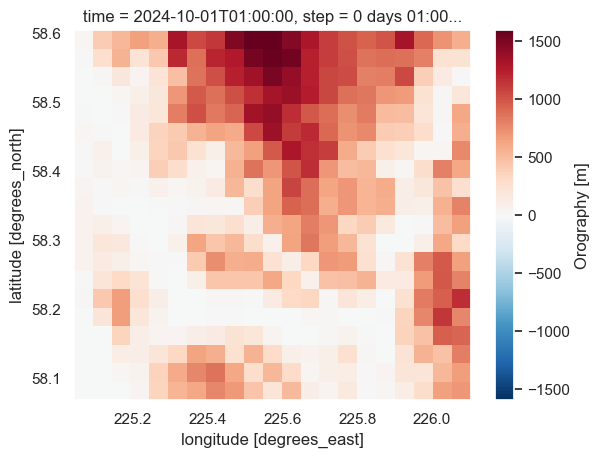

In [62]:
ds_hrrrak['orog'][0].plot()

The long was in 360 degree format instead of 180, but now it seems fixed? Just keep an eye on this when pulling a single location

In [63]:
# # longitude values are in 0 to 380 format instead of the -180 to 180 format. 
# # Convert longitude values from 0-360 to -180 to 180

# ds_hrrrak = ds_hrrrak.assign_coords(longitude=((ds_hrrrak.longitude + 180) % 360) - 180)
# ds_hrrrak['orog'][0].plot()

In [64]:
ds_hrrrak_pp['orog'].values[0]

np.float32(585.55096)

Powder Patch Met Station is at 2198 ft, 669.95 m so 654 m is not far off. 

## Load the Powder Patch Met Station Data 

In [65]:
# filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2024.txt'
filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2025_until16March2025.txt'

# open
df_met = pd.read_csv(filename, sep = ",")

# make utc_valid a datetime and index the df_met by it 
df_met['datetime'] = pd.to_datetime(df_met['utc_valid'])
df_met = df_met.set_index('datetime')
df_met.head()

,station,utc_valid,HGIRZZZ,PAIRZZZ,PCIRZZZ,PPDRZZZ,PPIRZZZ,PPPRZZZ,PPVRZZZ,PTIRZZZ,...,VVIRZZZ,VVPRZZZ,XCIRZZZ,XCPRZZZ,XPPRZZZ,XPQRZZZ,XRIRZZZ,XWIRZZZ,XWPRZZZ,sdIRZZZ
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-01 00:04:00,ECEA2,2024-10-01 00:04:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:09:00,ECEA2,2024-10-01 00:09:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:14:00,ECEA2,2024-10-01 00:14:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:19:00,ECEA2,2024-10-01 00:19:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:24:00,ECEA2,2024-10-01 00:24:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN


In [66]:
# light cleaning based on the first plot, just for the figure cleaning.. 
# drop PCIRZZZ values above 100 
df_met['PCIRZZZ'] = df_met['PCIRZZZ'].where(df_met['PCIRZZZ'] < 100) # only keep values less than 100

df_met['PPDRZZZ'] = df_met['PPDRZZZ'].where(df_met['PPDRZZZ'] > -100)
df_met['PPIRZZZ'] = df_met['PPIRZZZ'].where(df_met['PPIRZZZ'] > -100)
df_met['PPPRZZZ'] = df_met['PPPRZZZ'].where(df_met['PPPRZZZ'] > -100)
df_met['PPVRZZZ'] = df_met['PPVRZZZ'].where(df_met['PPVRZZZ'] > -100)


# drop any SDIRZZZ values above 100, for now 
df_met['SDIRZZZ'] = df_met['SDIRZZZ'].where(df_met['SDIRZZZ'] < 100)

In [67]:
# create a dataframe with individual observations of snow depth to then plot with the timeseries 
obs = {
    'datetime': ['2025-01-23', '2025-01-28', '2025-02-12', '2025-02-16', '2025-02-20', '2025-02-27', '2025-03-13'],
    'snowdepth': [126, 123, 133, 130, 128, 147, 177]
}

df_obs = pd.DataFrame(obs)
df_obs['datetime'] = pd.to_datetime(df_obs['datetime'])
df_obs.set_index('datetime', inplace=True)
# but keep datetime as a column too 
df_obs['datetime'] = df_obs.index
df_obs

,snowdepth,datetime
datetime,,
2025-01-23,126,2025-01-23
2025-01-28,123,2025-01-28
2025-02-12,133,2025-02-12
2025-02-16,130,2025-02-16
2025-02-20,128,2025-02-20
2025-02-27,147,2025-02-27
2025-03-13,177,2025-03-13


In [68]:
# lets only plot PPSA2 station data all together 
# create a new dataframe with only PPSA2 station data
df_met_pp = df_met[df_met['station'] == 'PPSA2']
# drop the columns where all the values are NaN
df_met_pp = df_met_pp.dropna(axis=1, how='all')
df_met_pp.head()

,station,utc_valid,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ
datetime,,,,,,
2024-10-01 00:00:00,PPSA2,2024-10-01 00:00:00,NaN,16.97,39.2,81.6
2024-10-01 01:00:00,PPSA2,2024-10-01 01:00:00,NaN,16.58,39.3,85.1
2024-10-01 02:00:00,PPSA2,2024-10-01 02:00:00,NaN,16.88,39.3,86.2
2024-10-01 03:00:00,PPSA2,2024-10-01 03:00:00,NaN,16.18,38.3,90.0
2024-10-01 04:00:00,PPSA2,2024-10-01 04:00:00,NaN,17.19,37.5,92.3


## Now, add in the hrrr-ak timeseries

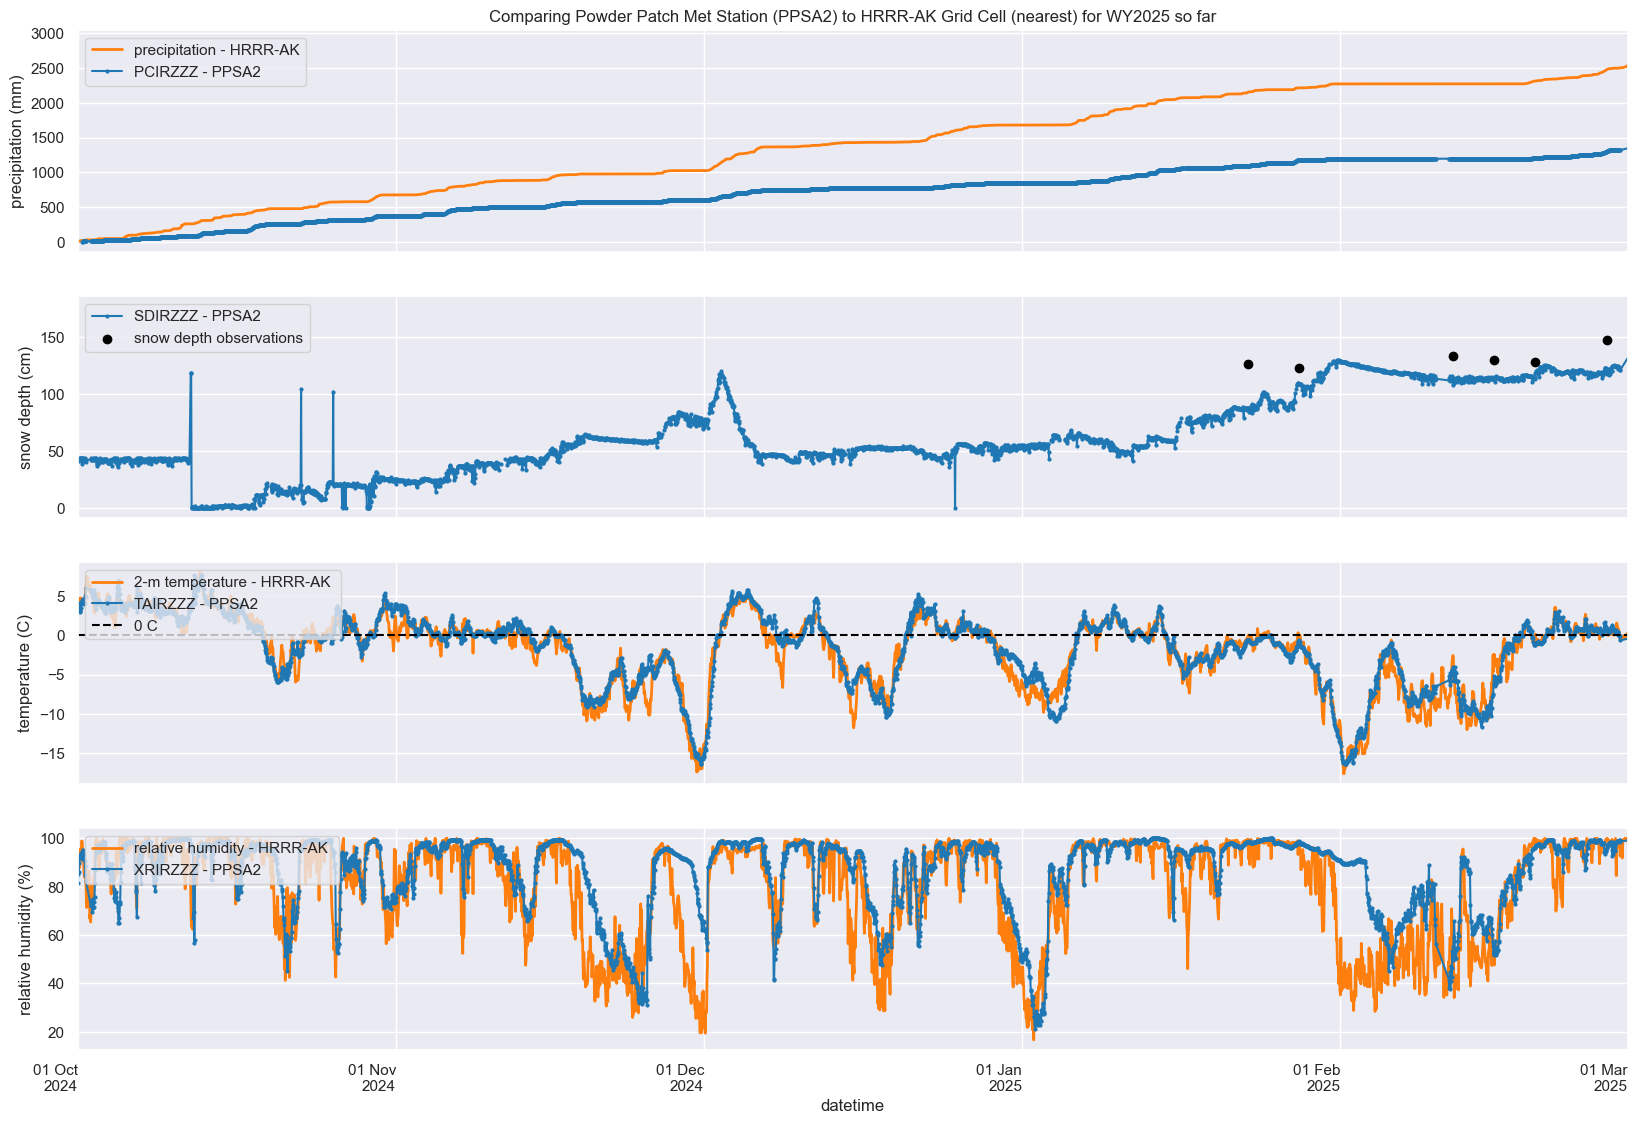

In [69]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15), sharex=True)

# and add in the hrrr-ak variables which match 
ds_hrrrak_pp['precip_total'].cumsum().plot(ax=ax[0], linestyle='-', label='precipitation - HRRR-AK', linewidth=2, color='tab:orange')  # mm
# ds_hrrrak_pp['precip_rate'].cumsum().plot(ax=ax[0], linestyle='-', label='precipitation - HRRR-AK', linewidth=2, color='red')  # mm
# ds_hrrrak_pp['snowdepth'].cumsum().plot(ax=ax[1], linestyle='-', label='Snow Depth - HRRR-AK', linewidth=2, color='tab:orange')  # cm
(ds_hrrrak_pp['temp'] - 273.15).plot(ax=ax[2], linestyle='-', label='2-m temperature - HRRR-AK ', linewidth=2, color='tab:orange')  # convert K to C
# (ds_hrrrak_pp['temp_surface'] - 273.15).plot(ax=ax[2], linestyle='-', label='surface temperature - HRRR-AK', linewidth=2, color='red')  # convert K to C
ds_hrrrak_pp['rh'].plot(ax=ax[3], linestyle='-', label='relative humidity - HRRR-AK ', linewidth=2, color='tab:orange')  # %


# df_met_pp data 
(df_met_pp['PCIRZZZ']*25.4).plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2', color='tab:blue') # mm
(df_met_pp['SDIRZZZ']*2.54).plot(ax=ax[1],marker='o', markersize=2, label='SDIRZZZ - PPSA2', color='tab:blue') # in inches 
((df_met_pp['TAIRZZZ'] - 32)*5.0/9.0).plot(ax=ax[2],marker='o', markersize=2, label='TAIRZZZ - PPSA2', color='tab:blue') # now in C
df_met_pp['XRIRZZZ'].plot(ax=ax[3],marker='o', markersize=2, label='XRIRZZZ - PPSA2', color='tab:blue')


# add plotting extra 
ax[1].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o') # add in the observations
ax[2].axhline(y=0, color='black', linestyle='--', label='0 C')

# Labels 
ax[0].set_title('Comparing Powder Patch Met Station (PPSA2) to HRRR-AK Grid Cell (nearest) for WY2025 so far')
ax[1].set_title('')
ax[2].set_title('')
ax[3].set_title('')

ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('snow depth (cm)')
ax[2].set_ylabel('temperature (C)')
ax[3].set_ylabel('relative humidity (%)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# select daterange 
start_date = '2024-10-01'
end_date = '2025-03-01'
# Filter the x-axis to show only the specified date range
for a in ax:
    a.set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)
ax[3].legend(loc=loc)

plt.show()

Change the snow depth subplot to precipitation rate

Calculate preciptiation rate

In [70]:
df_met_pp['PPIRZZZ'] = df_met_pp['PCIRZZZ'].diff() # subtract the previus value to get the difference 

# then drop any values about 10 
df_met_pp['PPIRZZZ'] = df_met_pp['PPIRZZZ'].where(df_met_pp['PPIRZZZ'] < 1)
df_met_pp

,station,utc_valid,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,,,
2024-10-01 00:00:00,PPSA2,2024-10-01 00:00:00,NaN,16.97,39.2,81.60,NaN
2024-10-01 01:00:00,PPSA2,2024-10-01 01:00:00,NaN,16.58,39.3,85.10,NaN
2024-10-01 02:00:00,PPSA2,2024-10-01 02:00:00,NaN,16.88,39.3,86.20,NaN
2024-10-01 03:00:00,PPSA2,2024-10-01 03:00:00,NaN,16.18,38.3,90.00,NaN
2024-10-01 04:00:00,PPSA2,2024-10-01 04:00:00,NaN,17.19,37.5,92.30,NaN
...,...,...,...,...,...,...,...
2025-03-15 20:00:00,PPSA2,2025-03-15 20:00:00,57.52,NaN,19.0,81.30,0.0
2025-03-15 21:00:00,PPSA2,2025-03-15 21:00:00,57.52,NaN,20.2,79.62,0.0
2025-03-15 22:00:00,PPSA2,2025-03-15 22:00:00,57.52,NaN,20.2,82.40,0.0


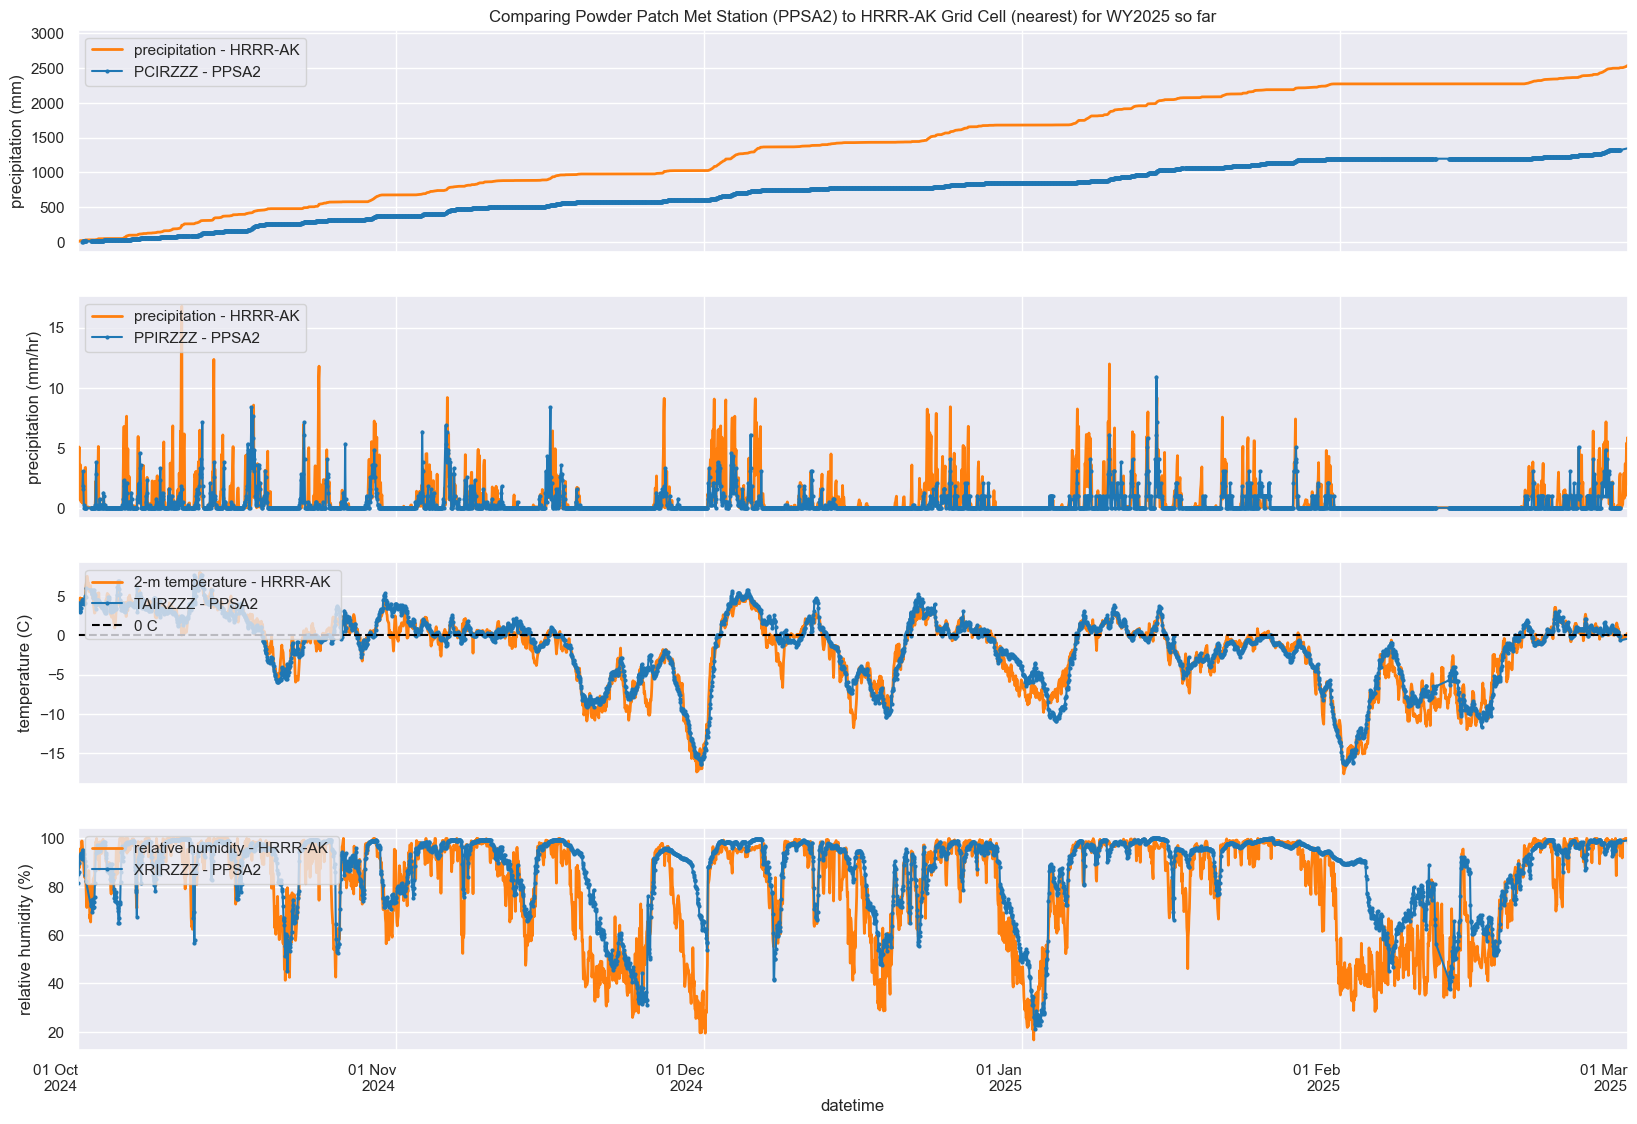

In [71]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15), sharex=True)

# the hrrr-ak variables
ds_hrrrak_pp['precip_total'].cumsum().plot(ax=ax[0], linestyle='-', label='precipitation - HRRR-AK', linewidth=2, color='tab:orange')  # mm
ds_hrrrak_pp['precip_total'].plot(ax=ax[1], linestyle='-', label='precipitation - HRRR-AK', linewidth=2, color='tab:orange')  # mm
# ds_hrrrak_pp['precip_rate'].plot(ax=ax[1], linestyle='-', label='precipitation - HRRR-AK', linewidth=2, color='tab:orange')  # mm
(ds_hrrrak_pp['temp'] - 273.15).plot(ax=ax[2], linestyle='-', label='2-m temperature - HRRR-AK ', linewidth=2, color='tab:orange')  # convert K to C
# (ds_hrrrak_pp['temp_surface'] - 273.15).plot(ax=ax[2], linestyle='-', label='surface temperature - HRRR-AK', linewidth=2, color='tab:orange')  # convert K to C
ds_hrrrak_pp['rh'].plot(ax=ax[3], linestyle='-', label='relative humidity - HRRR-AK ', linewidth=2, color='tab:orange')  # %

# df_met_pp data 
(df_met_pp['PCIRZZZ']*25.4).plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2', color='tab:blue') # now in mm 
(df_met_pp['PPIRZZZ']*25.4).plot(ax=ax[1],marker='o', markersize=2, label='PPIRZZZ - PPSA2', color='tab:blue') # now in mm 
((df_met_pp['TAIRZZZ'] - 32)*5.0/9.0).plot(ax=ax[2],marker='o', markersize=2, label='TAIRZZZ - PPSA2', color='tab:blue') # now in C
df_met_pp['XRIRZZZ'].plot(ax=ax[3],marker='o', markersize=2, label='XRIRZZZ - PPSA2', color='tab:blue')

# add plotting extra 
ax[2].axhline(y=0, color='black', linestyle='--', label='0 C')

# Labels 
ax[0].set_title('Comparing Powder Patch Met Station (PPSA2) to HRRR-AK Grid Cell (nearest) for WY2025 so far')
ax[1].set_title('')
ax[2].set_title('')
ax[3].set_title('')

ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm/hr)')
ax[2].set_ylabel('temperature (C)')
ax[3].set_ylabel('relative humidity (%)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# select daterange 
start_date = '2024-10-01'
end_date = '2025-03-01'
# Filter the x-axis to show only the specified date range
for a in ax:
    a.set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)
ax[3].legend(loc=loc)

# ax[1].set_ylim(-0.1,5)

plt.show()

# Get all the precipitation variables together 

In [72]:
# let's isolate all the precipitation variables to see how they compare
df_met.head()

,station,utc_valid,HGIRZZZ,PAIRZZZ,PCIRZZZ,PPDRZZZ,PPIRZZZ,PPPRZZZ,PPVRZZZ,PTIRZZZ,...,VVIRZZZ,VVPRZZZ,XCIRZZZ,XCPRZZZ,XPPRZZZ,XPQRZZZ,XRIRZZZ,XWIRZZZ,XWPRZZZ,sdIRZZZ
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-01 00:04:00,ECEA2,2024-10-01 00:04:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:09:00,ECEA2,2024-10-01 00:09:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:14:00,ECEA2,2024-10-01 00:14:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:19:00,ECEA2,2024-10-01 00:19:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:24:00,ECEA2,2024-10-01 00:24:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN


## The  useful precipiation variables 
1. PPIRZZZ - ECEA2 which is a 24hr accumulation
2. PCIRZZZ - PPSA2 which is a season accumulation
3. PCIRZZZ - SDIA2 which is a season accumulation as well 

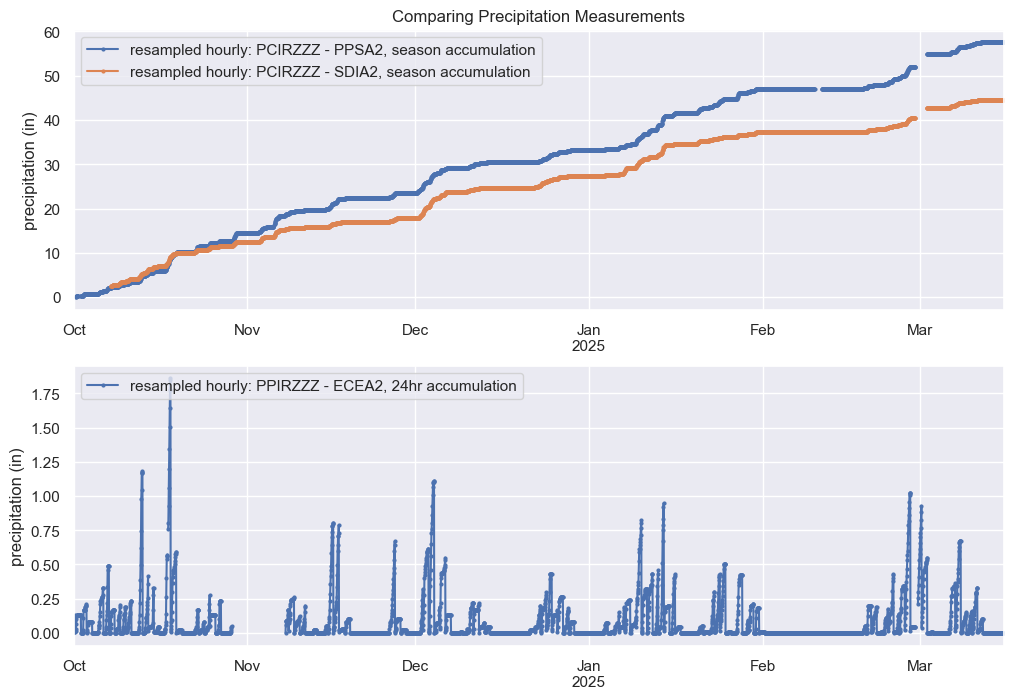

In [73]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)
df_met['PCIRZZZ'].where(df_met['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - PPSA2, season accumulation')
df_met['PCIRZZZ'].where(df_met['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - SDIA2, season accumulation')

df_met['PPIRZZZ'].where(df_met['station'] == 'ECEA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

# set titles and labels 
ax[0].set_title('Comparing Precipitation Measurements')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')

# zoom in the bottom plot
# start_date = '2023-12-14'
# end_date = '2023-12-18'

# start_date = '2023-12-14 08:00' # it looks like it starts on 09:00
# end_date = '2023-12-15 10:00'
# ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
# ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()


Create a precipitation df so that everything has the same datetimes for plotting 

In [74]:
# first save all the hourly datasets so this is easier to read and follow
PC_PPSA2 = (df_met['PCIRZZZ']*25.4).where(df_met['station'] == 'PPSA2').resample('h').mean()
# drop the weird value in PC_PPSA2 which is less than 100 
PC_PPSA2 = PC_PPSA2.where(PC_PPSA2 > 100)

PC_SDIA2 = (df_met['PCIRZZZ']*25.4).where(df_met['station'] == 'SDIA2').resample('h').mean()
PP_ECEA2 = (df_met['PPIRZZZ']*25.4).where(df_met['station'] == 'ECEA2').resample('h').mean()

# put all of these into a dataset together 
# create an empty pandas dataframe 
df_precip = pd.DataFrame()
df_precip['PC_PPSA2'] = PC_PPSA2.copy()
df_precip['PC_SDIA2'] = PC_SDIA2.copy()
df_precip['PP_ECEA2'] = PP_ECEA2.copy()
df_precip.head() 


,PC_PPSA2,PC_SDIA2,PP_ECEA2
datetime,,,
2024-10-01 00:00:00,NaN,NaN,0.207818
2024-10-01 01:00:00,NaN,NaN,0.254000
2024-10-01 02:00:00,NaN,NaN,0.359833
2024-10-01 03:00:00,NaN,NaN,1.460500
2024-10-01 04:00:00,NaN,NaN,2.307167


In [78]:
len(df_precip)

3985

In [85]:
# clip ds_hrrrak_pp to the date range of interest
start_date = '2024-10-01 01:00'
end_date = '2025-03-16 00:00'

ds_hrrrak_pp_clipped = ds_hrrrak_pp.sel(time=slice(start_date, end_date))
df_precip = df_precip.loc[start_date:end_date]

# Check the clipped dataset
ds_hrrrak_pp_clipped

<xarray.Dataset> Size: 335kB
Dimensions:       (time: 3984)
Coordinates:
  * time          (time) datetime64[ns] 32kB 2024-10-01T01:00:00 ... 2025-03-16
    step          (time) timedelta64[ns] 32kB ...
    valid_time    (time) datetime64[ns] 32kB ...
    latitude      float64 8B ...
    longitude     float64 8B ...
    y             float64 8B 58.27
    x             float64 8B 225.5
    spatial_ref   int64 8B 0
Data variables: (12/15)
    temp_surface  (time) float32 16kB ...
    pressure      (time) float32 16kB ...
    precip_rate   (time) float32 16kB ...
    snowdepth     (time) float32 16kB ...
    orog          (time) float32 16kB 585.6 585.6 585.6 ... 585.6 585.6 585.6
    precip_total  (time) float32 16kB 1.554 3.105 5.064 0.702 ... 0.0 0.0 0.0
    ...            ...
    lwrad         (time) float32 16kB ...
    temp          (time) float32 16kB 277.7 277.3 277.5 ... 268.0 268.2 268.0
    rh            (time) float32 16kB ...
    u10           (time) float32 16kB ...
    v10           (time) float32 16kB ...
    wind          (time) float32 16kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [86]:
len(df_precip)

3984

Now, they are the exact same daterange and we can combine hrrr into the dataframe for precip

In [80]:
ds_hrrrak_pp['precip_total'].values

array([1.554, 3.105, 5.064, ..., 0.   , 0.   , 0.   ],
      shape=(4368,), dtype=float32)

In [91]:
# add hrrr data to the df_precip 
# add HRRR-AK precipitation data to the df_precip
# df_precip['PP_HRRRAK'] = ds_hrrrak_pp_clipped['precip_total'].resample('h').mean().values
# df_precip['PC_HRRRAK'] = ds_hrrrak_pp_clipped['precip_total'].cumsum().resample('h').mean().values

df_precip['PR_HRRRAK'] = ds_hrrrak_pp_clipped['precip_total'].values
df_precip['PC_HRRRAK'] = ds_hrrrak_pp_clipped['precip_total'].cumsum().values
df_precip.head()

/tmp/ipykernel_1527118/3754699592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['PR_HRRRAK'] = ds_hrrrak_pp_clipped['precip_total'].values
/tmp/ipykernel_1527118/3754699592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['PC_HRRRAK'] = ds_hrrrak_pp_clipped['precip_total'].cumsum().values


,PC_PPSA2,PC_SDIA2,PP_ECEA2,PP_HRRRAK,PC_HRRRAK,PR_HRRRAK
datetime,,,,,,
2024-10-01 01:00:00,NaN,NaN,0.254000,1.554,1.554000,1.554
2024-10-01 02:00:00,NaN,NaN,0.359833,3.105,4.659000,3.105
2024-10-01 03:00:00,NaN,NaN,1.460500,5.064,9.723000,5.064
2024-10-01 04:00:00,NaN,NaN,2.307167,0.702,10.424999,0.702
2024-10-01 05:00:00,NaN,NaN,2.724727,1.887,12.311999,1.887


In [114]:
# now calculate the rate from the cumulative precipitation
df_precip['PR_PPSA2'] = df_precip['PC_PPSA2'].diff()  # Calculate the difference to get the rate
df_precip['PR_SDIA2'] = df_precip['PC_SDIA2'].diff()  # Calculate the difference to get the rate,
 
df_precip['PR_ECEA2'] = df_precip['PP_ECEA2'].diff()  # this one is daily accumulation so not sure....
df_precip['PR_ECEA2'] = df_precip['PR_ECEA2'].where(df_precip['PR_ECEA2'] >=0, df_precip['PP_ECEA2'])  # need to handle the daily rests 

# df_precip['PC_ECEA2'] = df_precip['PP_ECEA2'].cumsum()
df_precip['PC_ECEA2'] = df_precip['PR_ECEA2'].cumsum()

df_precip.head()

,PC_PPSA2,PC_SDIA2,PP_ECEA2,PP_HRRRAK,PC_HRRRAK,PR_HRRRAK,PR_PPSA2,PR_SDIA2,PR_ECEA2,PC_ECEA2
datetime,,,,,,,,,,
2024-10-01 01:00:00,NaN,NaN,0.254000,1.554,1.554000,1.554,NaN,NaN,0.254000,0.254000
2024-10-01 02:00:00,NaN,NaN,0.359833,3.105,4.659000,3.105,NaN,NaN,0.105833,0.359833
2024-10-01 03:00:00,NaN,NaN,1.460500,5.064,9.723000,5.064,NaN,NaN,1.100667,1.460500
2024-10-01 04:00:00,NaN,NaN,2.307167,0.702,10.424999,0.702,NaN,NaN,0.846667,2.307167
2024-10-01 05:00:00,NaN,NaN,2.724727,1.887,12.311999,1.887,NaN,NaN,0.417561,2.724727


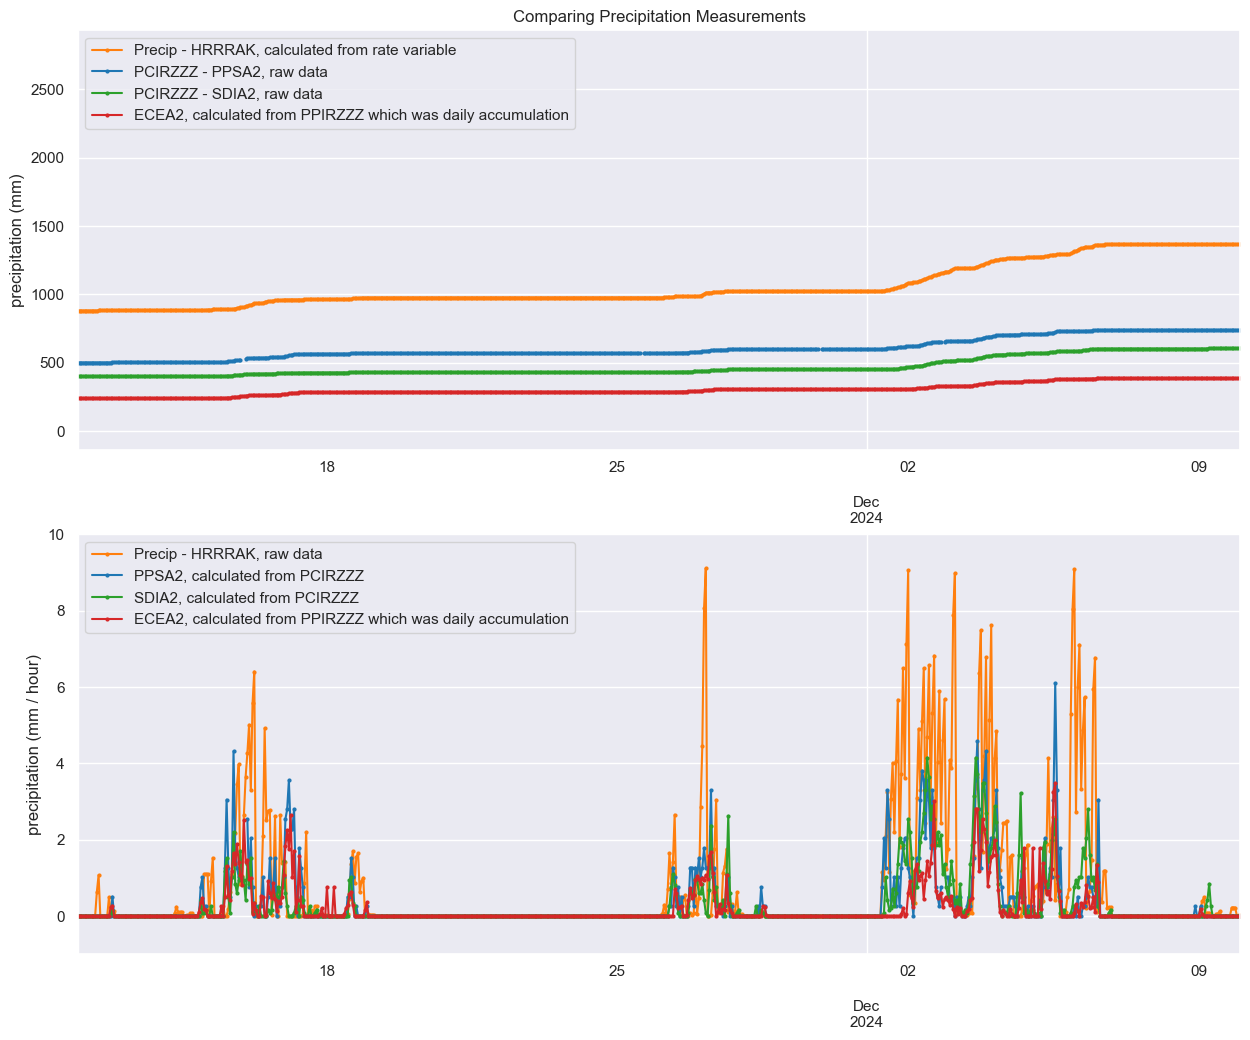

In [131]:
# fig, ax = plt.subplots(3,1, figsize=(15, 12), sharex=False, sharey=False)
fig, ax = plt.subplots(2,1, figsize=(15, 12), sharex=False, sharey=False)

df_precip['PC_HRRRAK'].plot(ax=ax[0], marker='o', markersize=2,label='Precip - HRRRAK, calculated from rate variable', color='tab:orange')  # mm
df_precip['PC_PPSA2'].plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - PPSA2, raw data', color='tab:blue')  # mm
df_precip['PC_SDIA2'].plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - SDIA2, raw data', color='tab:green')  # mm
df_precip['PC_ECEA2'].plot(ax=ax[0], marker='o', markersize=2, label='ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm


df_precip['PR_HRRRAK'].plot(ax=ax[1], marker='o', markersize=2,label='Precip - HRRRAK, raw data', color='tab:orange')  # mm
df_precip['PR_PPSA2'].plot(ax=ax[1], marker='o', markersize=2, label='PPSA2, calculated from PCIRZZZ', color='tab:blue')  # mm
df_precip['PR_SDIA2'].plot(ax=ax[1], marker='o', markersize=2, label='SDIA2, calculated from PCIRZZZ', color='tab:green')  # mm
df_precip['PR_ECEA2'].plot(ax=ax[1], marker='o', markersize=2, label='ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm

# daily accumulation just for the ECEA2 raw data 
# df_precip['PP_ECEA2'].plot(ax=ax[2], marker='o', markersize=2, label='PPIRZZZ - ECEA2, raw data daily accumulation', color='tab:red')  # mm


# set titles and labels 
ax[0].set_title('Comparing Precipitation Measurements')
ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm / hour)')
# ax[2].set_ylabel('precipitation (mm / day)')

# zoom in the bottom plot
start_date = '2024-11-12'
end_date = '2024-12-10'
ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
# ax[2].legend(loc='upper left')

ax[1].set_ylim(-1, 10)  # Set y-limits for the second plot to zoom in on the precipitation rates


plt.show()

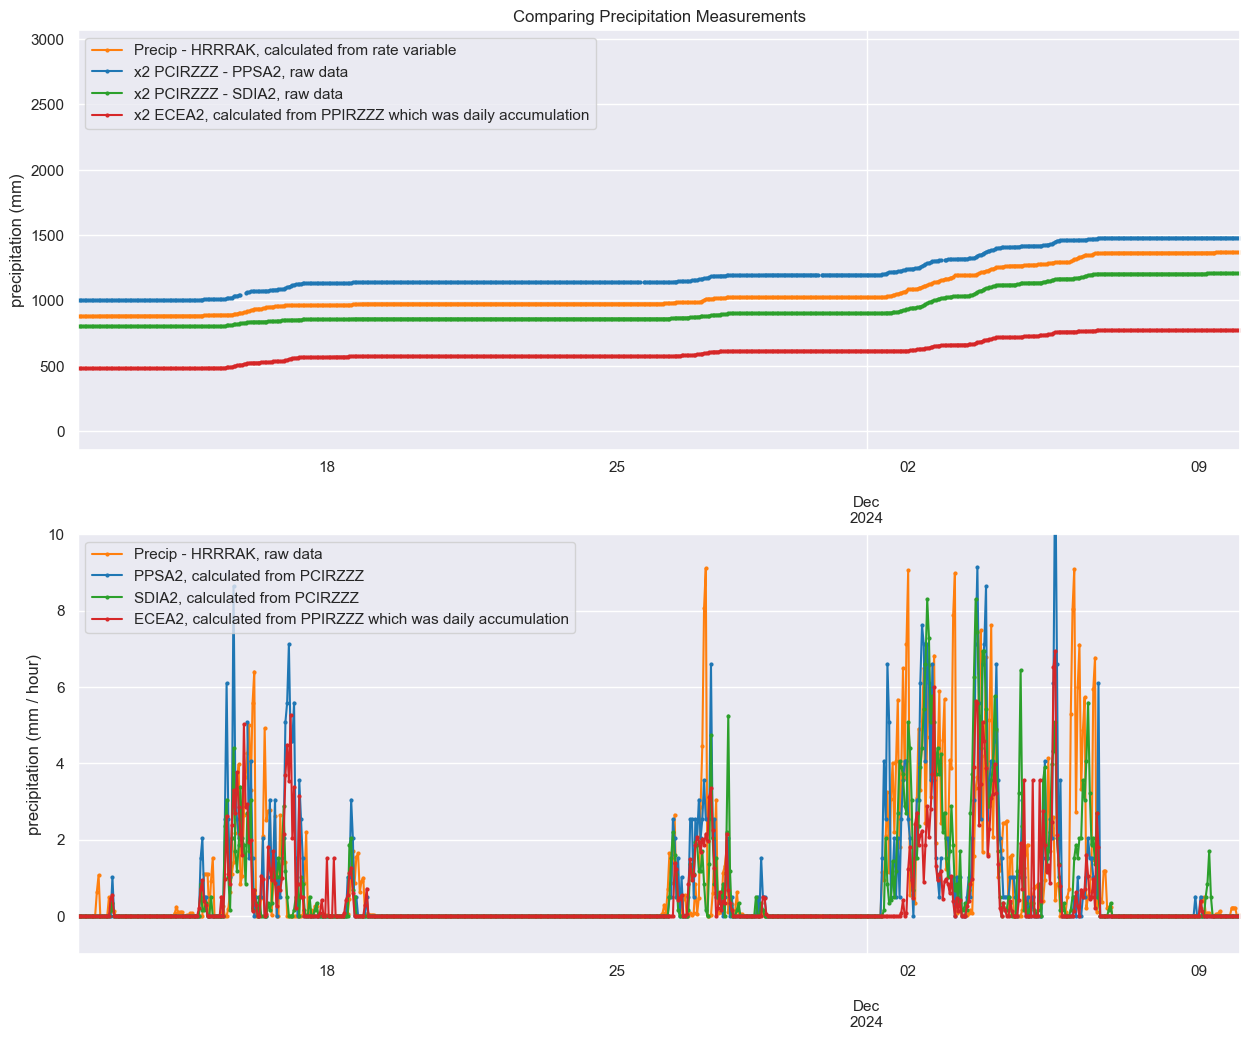

In [129]:
# fig, ax = plt.subplots(3,1, figsize=(15, 12), sharex=False, sharey=False)
fig, ax = plt.subplots(2,1, figsize=(15, 12), sharex=False, sharey=False)

df_precip['PC_HRRRAK'].plot(ax=ax[0], marker='o', markersize=2,label='Precip - HRRRAK, calculated from rate variable', color='tab:orange')  # mm
(df_precip['PC_PPSA2']*2).plot(ax=ax[0], marker='o', markersize=2, label='x2 PCIRZZZ - PPSA2, raw data', color='tab:blue')  # mm
(df_precip['PC_SDIA2']*2).plot(ax=ax[0], marker='o', markersize=2, label='x2 PCIRZZZ - SDIA2, raw data', color='tab:green')  # mm
(df_precip['PC_ECEA2']*2).plot(ax=ax[0], marker='o', markersize=2, label='x2 ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm


df_precip['PR_HRRRAK'].plot(ax=ax[1], marker='o', markersize=2,label='Precip - HRRRAK, raw data', color='tab:orange')  # mm
(df_precip['PR_PPSA2']*2).plot(ax=ax[1], marker='o', markersize=2, label='PPSA2, calculated from PCIRZZZ', color='tab:blue')  # mm
(df_precip['PR_SDIA2']*2).plot(ax=ax[1], marker='o', markersize=2, label='SDIA2, calculated from PCIRZZZ', color='tab:green')  # mm
(df_precip['PR_ECEA2']*2).plot(ax=ax[1], marker='o', markersize=2, label='ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm

# daily accumulation just for the ECEA2 raw data 
# df_precip['PP_ECEA2'].plot(ax=ax[2], marker='o', markersize=2, label='PPIRZZZ - ECEA2, raw data daily accumulation', color='tab:red')  # mm


# set titles and labels 
ax[0].set_title('Comparing Precipitation Measurements')
ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm / hour)')
# ax[2].set_ylabel('precipitation (mm / day)')

# zoom in the bottom plot
start_date = '2024-11-12'
end_date = '2024-12-10'
ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
# ax[2].legend(loc='upper left')

ax[1].set_ylim(-1, 10)  # Set y-limits for the second plot to zoom in on the precipitation rates

plt.show()

### Out of curiousity, we could pull data from SDIA location on HRRR lower in the watershed.... to compare 

In [ ]:
lat_SDIA2 = 58.27720
lon_SDIA2 = -134.38920

# select the nearest grid point to the given lat/lon for SDIA2
ds_hrrrak_sdia2 = ds_hrrrak.sel(y=lat_SDIA2, x=lon_SDIA2, method='nearest')
ds_hrrrak_sdia2

<xarray.Dataset> Size: 367kB
Dimensions:       (time: 4368)
Coordinates:
  * time          (time) datetime64[ns] 35kB 2024-10-01T01:00:00 ... 2025-04-01
    step          (time) timedelta64[ns] 35kB ...
    valid_time    (time) datetime64[ns] 35kB ...
    latitude      float64 8B ...
    longitude     float64 8B ...
    y             float64 8B 58.27
    x             float64 8B 225.1
    spatial_ref   int64 8B 0
Data variables: (12/15)
    temp_surface  (time) float32 17kB ...
    pressure      (time) float32 17kB ...
    precip_rate   (time) float32 17kB ...
    snowdepth     (time) float32 17kB ...
    orog          (time) float32 17kB ...
    precip_total  (time) float32 17kB ...
    ...            ...
    lwrad         (time) float32 17kB ...
    temp          (time) float32 17kB ...
    rh            (time) float32 17kB ...
    u10           (time) float32 17kB ...
    v10           (time) float32 17kB ...
    wind          (time) float32 17kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [134]:
ds_hrrrak_sdia2['orog'].values[0]  # check the orography value for SDIA2

np.float32(62.957237)

The elevation of SDIA2 is 0.7822 meters. So sea level.\
Now, fix the date again for the hrrr timeseries

In [135]:
# clip ds_hrrrak_sdia2 to the date range of interest
start_date = '2024-10-01 01:00'
end_date = '2025-03-16 00:00'

ds_hrrrak_SDIA2_clipped = ds_hrrrak_sdia2.sel(time=slice(start_date, end_date))
df_precip = df_precip.loc[start_date:end_date]

# Check the clipped dataset
ds_hrrrak_SDIA2_clipped

<xarray.Dataset> Size: 335kB
Dimensions:       (time: 3984)
Coordinates:
  * time          (time) datetime64[ns] 32kB 2024-10-01T01:00:00 ... 2025-03-16
    step          (time) timedelta64[ns] 32kB ...
    valid_time    (time) datetime64[ns] 32kB ...
    latitude      float64 8B ...
    longitude     float64 8B ...
    y             float64 8B 58.27
    x             float64 8B 225.1
    spatial_ref   int64 8B 0
Data variables: (12/15)
    temp_surface  (time) float32 16kB ...
    pressure      (time) float32 16kB ...
    precip_rate   (time) float32 16kB ...
    snowdepth     (time) float32 16kB ...
    orog          (time) float32 16kB 62.96 62.96 62.96 ... 62.96 62.96 62.96
    precip_total  (time) float32 16kB ...
    ...            ...
    lwrad         (time) float32 16kB ...
    temp          (time) float32 16kB ...
    rh            (time) float32 16kB ...
    u10           (time) float32 16kB ...
    v10           (time) float32 16kB ...
    wind          (time) float32 16kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

And add the values to the `df_precip`

In [136]:
df_precip['PR_HRRRAK_SDIA2'] = ds_hrrrak_SDIA2_clipped['precip_total'].values
df_precip['PC_HRRRAK_SDIA2'] = ds_hrrrak_SDIA2_clipped['precip_total'].cumsum().values
df_precip.head()

,PC_PPSA2,PC_SDIA2,PP_ECEA2,PP_HRRRAK,PC_HRRRAK,PR_HRRRAK,PR_PPSA2,PR_SDIA2,PR_ECEA2,PC_ECEA2,PR_HRRRAK_SDIA2,PC_HRRRAK_SDIA2
datetime,,,,,,,,,,,,
2024-10-01 01:00:00,NaN,NaN,0.254000,1.554,1.554000,1.554,NaN,NaN,0.254000,0.254000,3.725,3.725000
2024-10-01 02:00:00,NaN,NaN,0.359833,3.105,4.659000,3.105,NaN,NaN,0.105833,0.359833,6.465,10.190001
2024-10-01 03:00:00,NaN,NaN,1.460500,5.064,9.723000,5.064,NaN,NaN,1.100667,1.460500,9.698,19.888000
2024-10-01 04:00:00,NaN,NaN,2.307167,0.702,10.424999,0.702,NaN,NaN,0.846667,2.307167,0.671,20.559000
2024-10-01 05:00:00,NaN,NaN,2.724727,1.887,12.311999,1.887,NaN,NaN,0.417561,2.724727,1.156,21.715000


And then remake the two plots above here, including the HRRR-AK data at PPSA2 and SDIA2

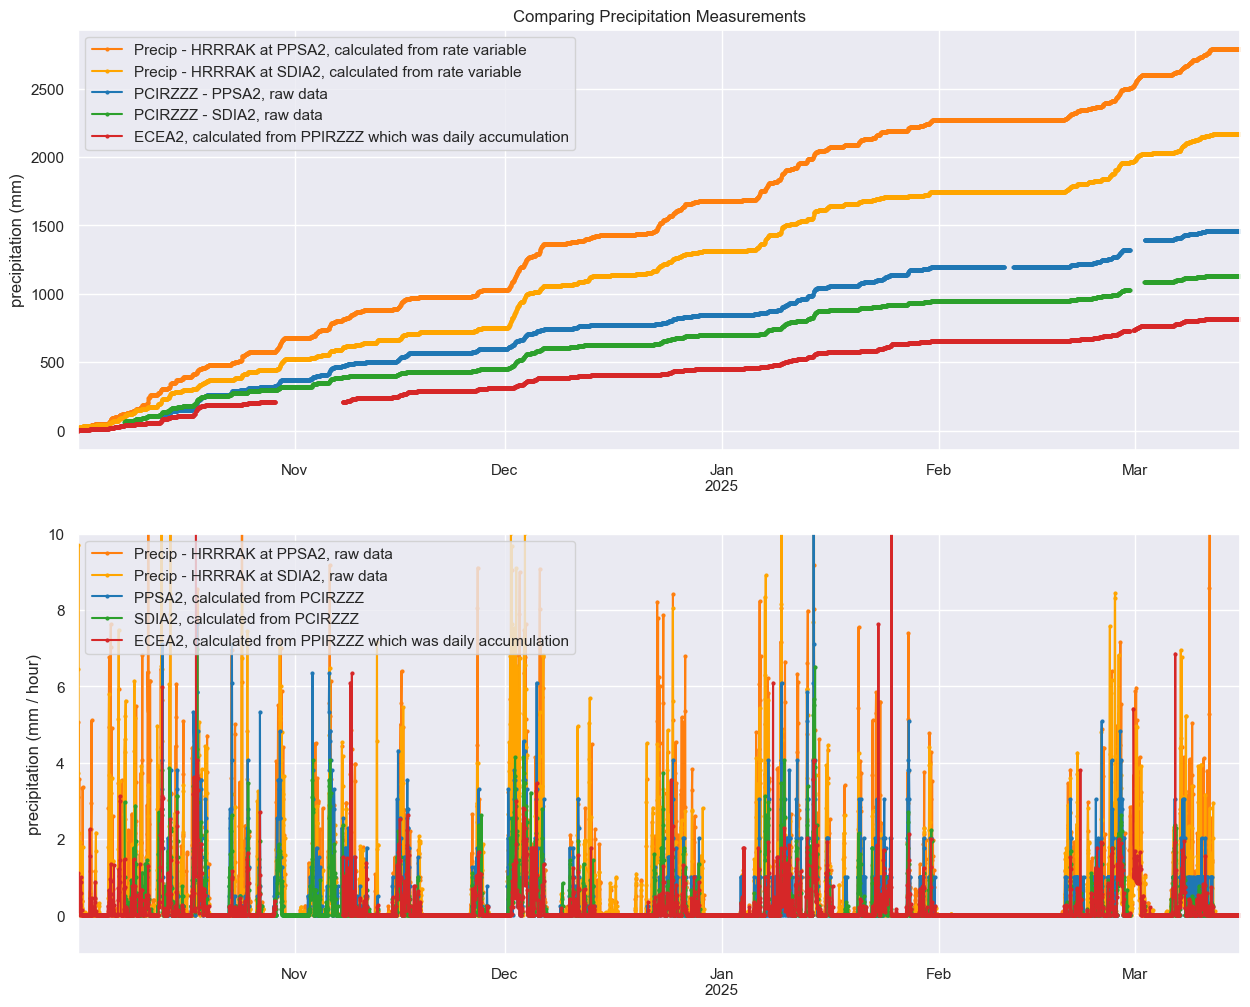

In [ ]:
# fig, ax = plt.subplots(3,1, figsize=(15, 12), sharex=False, sharey=False)
fig, ax = plt.subplots(2,1, figsize=(15, 12), sharex=False, sharey=False)

df_precip['PC_HRRRAK'].plot(ax=ax[0], marker='o', markersize=2,label='Precip - HRRRAK at PPSA2, calculated from rate variable', color='tab:orange')  # mm
df_precip['PC_HRRRAK_SDIA2'].plot(ax=ax[0], marker='o', markersize=2,label='Precip - HRRRAK at SDIA2, calculated from rate variable', color='orange')  # mm

df_precip['PC_PPSA2'].plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - PPSA2, raw data', color='tab:blue')  # mm
df_precip['PC_SDIA2'].plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - SDIA2, raw data', color='tab:green')  # mm
df_precip['PC_ECEA2'].plot(ax=ax[0], marker='o', markersize=2, label='ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm

df_precip['PR_HRRRAK'].plot(ax=ax[1], marker='o', markersize=2,label='Precip - HRRRAK at PPSA2, raw data', color='tab:orange')  # mm
df_precip['PR_HRRRAK_SDIA2'].plot(ax=ax[1], marker='o', markersize=2,label='Precip - HRRRAK at SDIA2, raw data', color='orange')  # mm

df_precip['PR_PPSA2'].plot(ax=ax[1], marker='o', markersize=2, label='PPSA2, calculated from PCIRZZZ', color='tab:blue')  # mm
df_precip['PR_SDIA2'].plot(ax=ax[1], marker='o', markersize=2, label='SDIA2, calculated from PCIRZZZ', color='tab:green')  # mm
df_precip['PR_ECEA2'].plot(ax=ax[1], marker='o', markersize=2, label='ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm

# daily accumulation just for the ECEA2 raw data 
# df_precip['PP_ECEA2'].plot(ax=ax[2], marker='o', markersize=2, label='PPIRZZZ - ECEA2, raw data daily accumulation', color='tab:red')  # mm


# set titles and labels 
ax[0].set_title('Comparing Precipitation Measurements')
ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm / hour)')
# ax[2].set_ylabel('precipitation (mm / day)')

# zoom in the bottom plot
# start_date = '2024-11-12'
# end_date = '2024-12-10'
# ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
# ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
# ax[2].legend(loc='upper left')

ax[1].set_ylim(-1, 10)  # Set y-limits for the second plot to zoom in on the precipitation rates


plt.show()

The plot below multiplies the measured precipitation x2 to see how that compares with HRRR-AK, since we know that measured precipitation is often off by a factor of 2. 

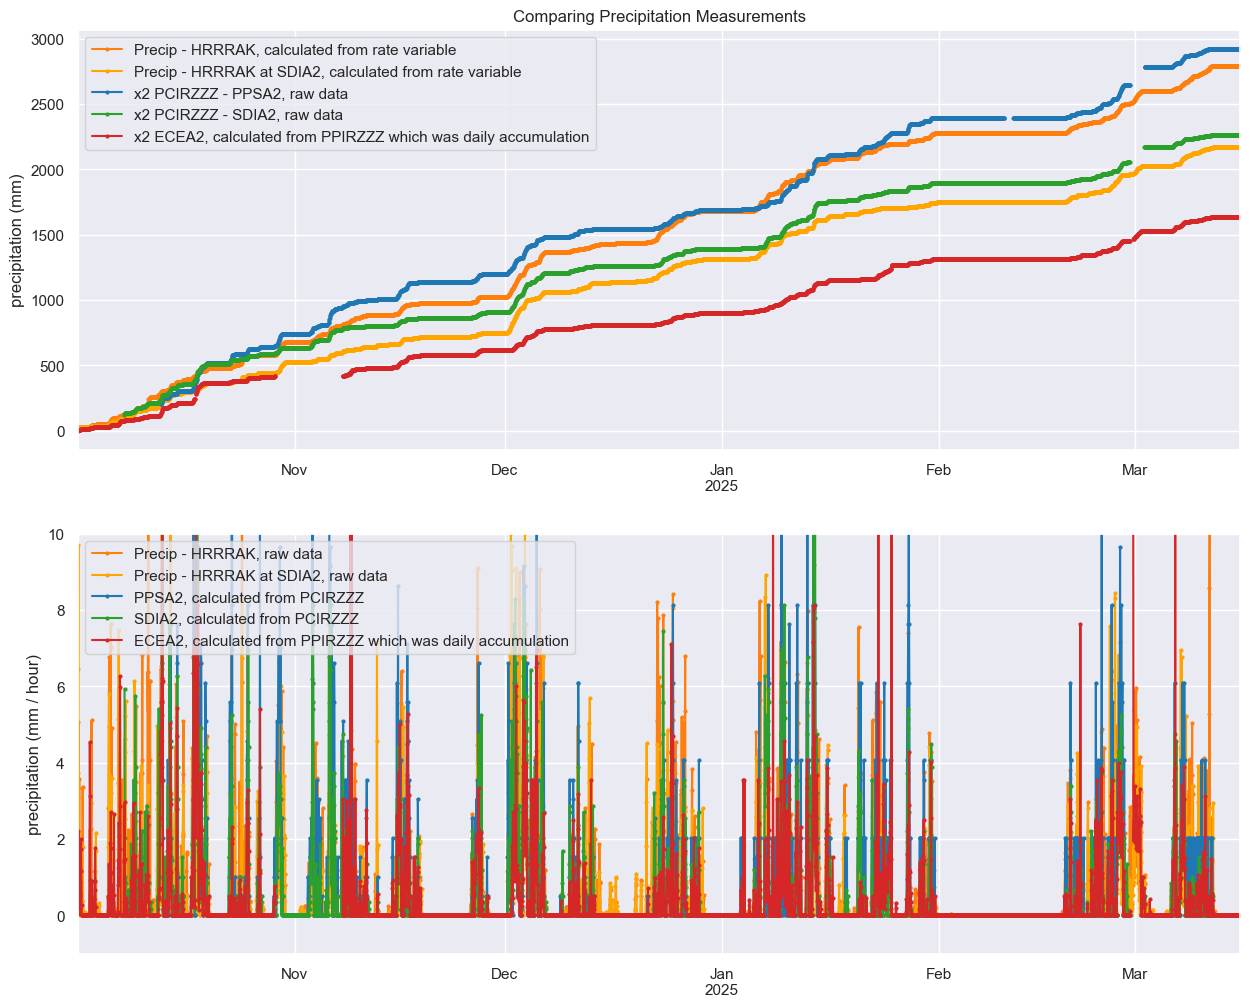

In [142]:
# fig, ax = plt.subplots(3,1, figsize=(15, 12), sharex=False, sharey=False)
fig, ax = plt.subplots(2,1, figsize=(15, 12), sharex=False, sharey=False)

df_precip['PC_HRRRAK'].plot(ax=ax[0], marker='o', markersize=2,label='Precip - HRRRAK, calculated from rate variable', color='tab:orange')  # mm
df_precip['PC_HRRRAK_SDIA2'].plot(ax=ax[0], marker='o', markersize=2,label='Precip - HRRRAK at SDIA2, calculated from rate variable', color='orange')  # mm

(df_precip['PC_PPSA2']*2).plot(ax=ax[0], marker='o', markersize=2, label='x2 PCIRZZZ - PPSA2, raw data', color='tab:blue')  # mm
(df_precip['PC_SDIA2']*2).plot(ax=ax[0], marker='o', markersize=2, label='x2 PCIRZZZ - SDIA2, raw data', color='tab:green')  # mm
(df_precip['PC_ECEA2']*2).plot(ax=ax[0], marker='o', markersize=2, label='x2 ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm

df_precip['PR_HRRRAK'].plot(ax=ax[1], marker='o', markersize=2,label='Precip - HRRRAK, raw data', color='tab:orange')  # mm
df_precip['PR_HRRRAK_SDIA2'].plot(ax=ax[1], marker='o', markersize=2,label='Precip - HRRRAK at SDIA2, raw data', color='orange')  # mm

(df_precip['PR_PPSA2']*2).plot(ax=ax[1], marker='o', markersize=2, label='PPSA2, calculated from PCIRZZZ', color='tab:blue')  # mm
(df_precip['PR_SDIA2']*2).plot(ax=ax[1], marker='o', markersize=2, label='SDIA2, calculated from PCIRZZZ', color='tab:green')  # mm
(df_precip['PR_ECEA2']*2).plot(ax=ax[1], marker='o', markersize=2, label='ECEA2, calculated from PPIRZZZ which was daily accumulation', color='tab:red')  # mm

# daily accumulation just for the ECEA2 raw data 
# df_precip['PP_ECEA2'].plot(ax=ax[2], marker='o', markersize=2, label='PPIRZZZ - ECEA2, raw data daily accumulation', color='tab:red')  # mm


# set titles and labels 
ax[0].set_title('Comparing Precipitation Measurements')
ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm / hour)')
# ax[2].set_ylabel('precipitation (mm / day)')

# # zoom in the bottom plot
# start_date = '2024-11-12'
# end_date = '2024-12-10'
# ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
# ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
# ax[2].legend(loc='upper left')

ax[1].set_ylim(-1, 10)  # Set y-limits for the second plot to zoom in on the precipitation rates

plt.show()

Looks good. 